<a href="https://colab.research.google.com/github/leonardo0231/Special-topics/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libarary

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load datas

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# create a def for bulid models

In [10]:
def build_model(pooling='max', dropout=None,
                kernel_size=3, stride=1, depth=(32, 64, 128)):
                model = models.Sequential()

                # Conv Layer 1
                model.add(layers.Conv2D(depth[0],
                                        kernel_size,
                                        strides=stride,
                                        padding='same',
                                        activation='relu',
                                        input_shape=(28, 28, 1)))
                if pooling == 'max':
                  model.add(layers.MaxPooling2D(pool_size=(2,2)))
                elif pooling == 'avg':
                  model.add(layers.AveragePooling2D(pool_size=(2,2)))

                # Conv Layer 2
                model.add(layers.Conv2D(depth[1],
                                        kernel_size,
                                        strides=stride,
                                        padding='same',
                                        activation='relu'))
                if pooling == 'max':
                  model.add(layers.MaxPooling2D(pool_size=(2,2)))
                elif pooling == 'avg':
                  model.add(layers.AveragePooling2D(pool_size=(2,2)))

                # Conv Layer 3
                model.add(layers.Conv2D(depth[2],
                                        kernel_size,
                                        strides=stride,
                                        activation='relu',
                                        padding='same'))

                model.add(layers.Flatten())

                # Dense Layers (4 Dense)
                model.add(layers.Dense(256, activation='relu'))
                if dropout:
                  model.add(layers.Dropout(dropout))

                model.add(layers.Dense(128, activation='relu'))
                model.add(layers.Dense(64, activation='relu'))
                model.add(layers.Dense(10, activation='softmax'))

                model.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])
                return model

# create and run models

In [11]:
print("Running model: Max Pooling")
model_max = build_model(pooling='max')
history_max = model_max.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)


Running model: Max Pooling


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7016 - loss: 0.8064 - val_accuracy: 0.8648 - val_loss: 0.3745
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8813 - loss: 0.3217 - val_accuracy: 0.8968 - val_loss: 0.2864
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9014 - loss: 0.2647 - val_accuracy: 0.9089 - val_loss: 0.2541
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9139 - loss: 0.2275 - val_accuracy: 0.9129 - val_loss: 0.2371
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9228 - loss: 0.2050 - val_accuracy: 0.9048 - val_loss: 0.2498
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9340 - loss: 0.1797 - val_accuracy: 0.9162 - val_loss: 0.2302
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9421 - loss: 0.1530 - val_accuracy: 0.9098 - val_loss: 0.2375
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9497 - loss: 0.1372 - val_accuracy: 0

In [12]:
print("Running model: Average Pooling")
model_avg = build_model(pooling='avg')
history_avg = model_avg.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Running model: Average Pooling
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6918 - loss: 0.8238 - val_accuracy: 0.8553 - val_loss: 0.3971
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8681 - loss: 0.3633 - val_accuracy: 0.8802 - val_loss: 0.3279
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8903 - loss: 0.2975 - val_accuracy: 0.8970 - val_loss: 0.2886
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9072 - loss: 0.2532 - val_accuracy: 0.9062 - val_loss: 0.2571
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9145 - loss: 0.2315 - val_accuracy: 0.9025 - val_loss: 0.2675
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9217 - loss: 0.2135 - val_accuracy: 0.9095 - val_loss: 0.2602
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9287 - loss: 0.1905 - val_accuracy: 0.9068 - val_loss: 0.2623
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9355 - 

In [13]:
print("Running model: Dropout")
model_dropout = build_model(dropout=0.5)
history_dropout = model_dropout.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Running model: Dropout
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6668 - loss: 0.8802 - val_accuracy: 0.8663 - val_loss: 0.3657
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8678 - loss: 0.3675 - val_accuracy: 0.8884 - val_loss: 0.3093
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8944 - loss: 0.2937 - val_accuracy: 0.8993 - val_loss: 0.2720
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9107 - loss: 0.2498 - val_accuracy: 0.9079 - val_loss: 0.2477
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9162 - loss: 0.2307 - val_accuracy: 0.9172 - val_loss: 0.2280
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9238 - loss: 0.2036 - val_accuracy: 0.9185 - val_loss: 0.2222
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9316 - loss: 0.1893 - val_accuracy: 0.9154 - val_loss: 0.2344
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9354 - loss: 0.

In [14]:
print("Running model: Kernel size")
model_k5 = build_model(kernel_size=5)
history_k5 = model_k5.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Running model: Kernel size
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6940 - loss: 0.8216 - val_accuracy: 0.8695 - val_loss: 0.3567
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8784 - loss: 0.3302 - val_accuracy: 0.8941 - val_loss: 0.3017
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9009 - loss: 0.2669 - val_accuracy: 0.9013 - val_loss: 0.2775
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9141 - loss: 0.2323 - val_accuracy: 0.9080 - val_loss: 0.2482
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9251 - loss: 0.2043 - val_accuracy: 0.9143 - val_loss: 0.2413
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9353 - loss: 0.1728 - val_accuracy: 0.9124 - val_loss: 0.2538
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9456 - loss: 0.1512 - val_accuracy: 0.9218 - val_loss: 0.2279
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9492 - los

In [15]:
print("Running model: Stride")
model_stride2 = build_model(stride=2)
history_stride2 = model_stride2.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Running model: Stride
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5878 - loss: 1.1196 - val_accuracy: 0.8073 - val_loss: 0.4994
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8222 - loss: 0.4721 - val_accuracy: 0.8296 - val_loss: 0.4438
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8584 - loss: 0.3870 - val_accuracy: 0.8622 - val_loss: 0.3800
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8775 - loss: 0.3349 - val_accuracy: 0.8729 - val_loss: 0.3487
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8890 - loss: 0.3048 - val_accuracy: 0.8808 - val_loss: 0.3306
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8979 - loss: 0.2782 - val_accuracy: 0.8866 - val_loss: 0.3071
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9054 - loss: 0.2621 - val_accuracy: 0.8829 - val_loss: 0.3194
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9101 - loss: 0.2

In [16]:
print("Running model: Depth")
model_deep = build_model(depth=(64, 128, 256))
history_deep = model_deep.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=128
)

Running model: Depth
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7307 - loss: 0.7146 - val_accuracy: 0.8812 - val_loss: 0.3224
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8879 - loss: 0.3038 - val_accuracy: 0.8959 - val_loss: 0.2795
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9161 - loss: 0.2297 - val_accuracy: 0.9114 - val_loss: 0.2385
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9296 - loss: 0.1942 - val_accuracy: 0.9140 - val_loss: 0.2352
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9355 - loss: 0.1706 - val_accuracy: 0.9178 - val_loss: 0.2303
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9489 - loss: 0.1395 - val_accuracy: 0.9197 - val_loss: 0.2261
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9532 - loss: 0.1279 - val_accuracy: 0.9245 - val_loss: 0.2245
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9634 - l

In [17]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.legend(['Train', 'Validation'])

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.legend(['Train', 'Validation'])

    plt.show()


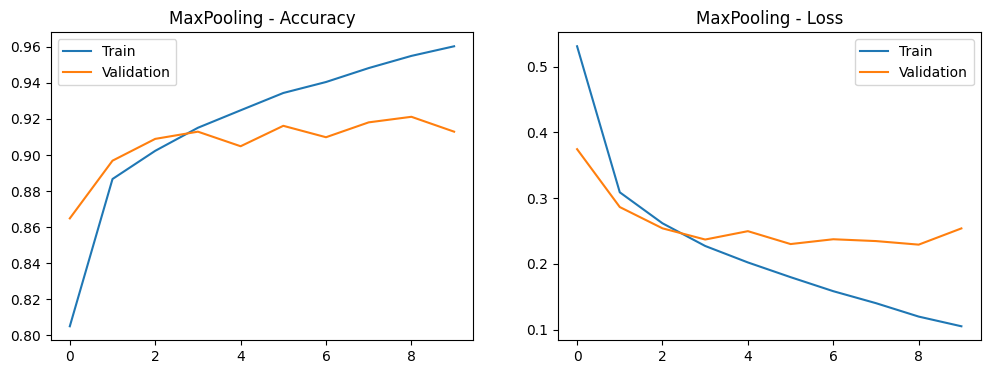

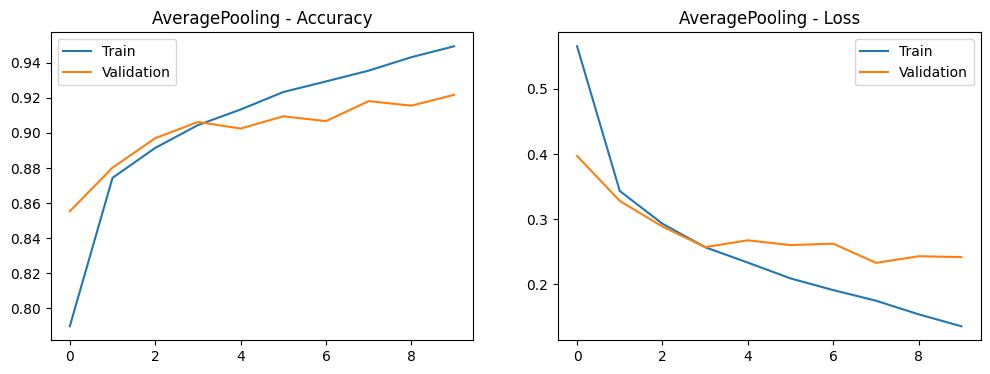

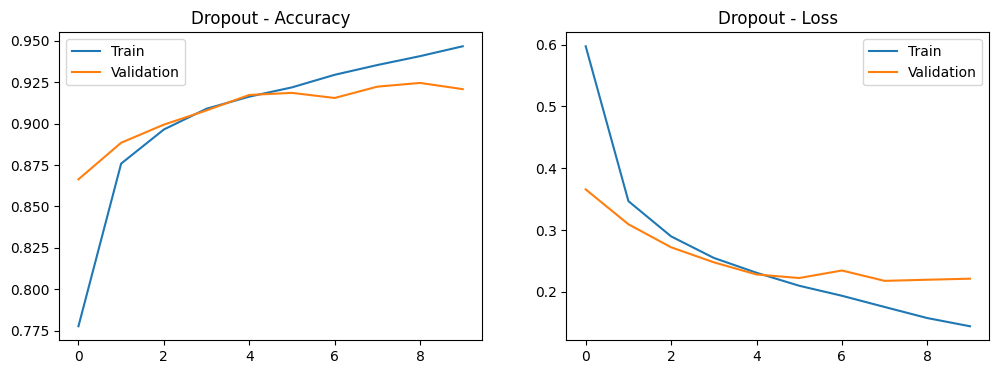

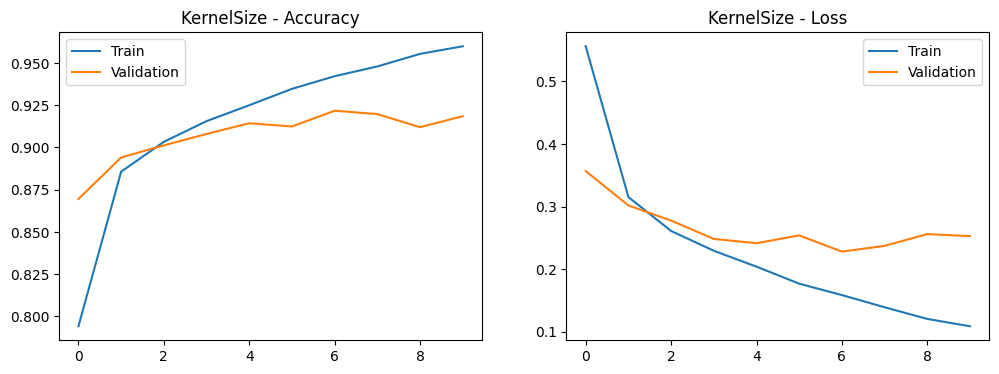

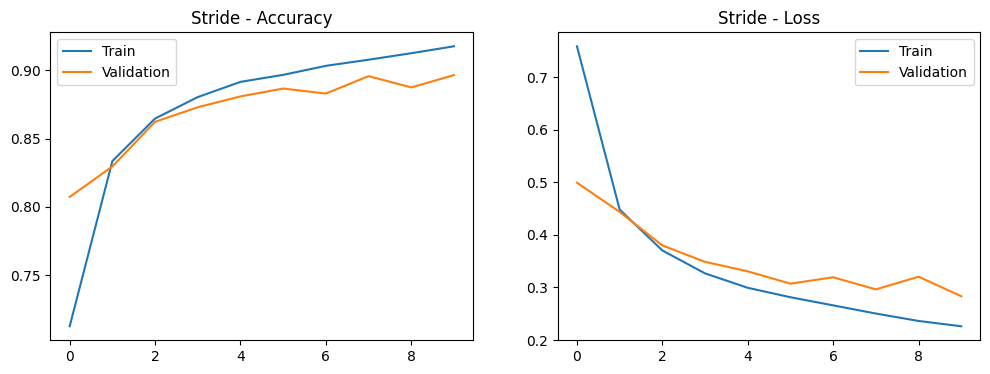

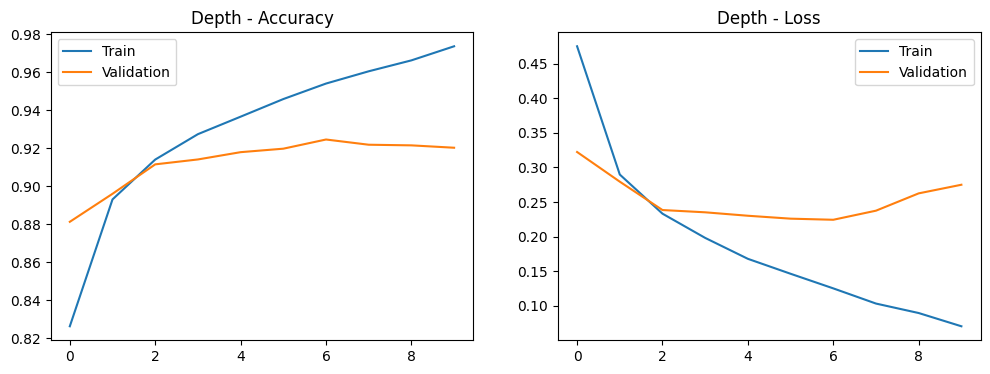

In [19]:
plot_history(history_max, "MaxPooling")
plot_history(history_avg, "AveragePooling")
plot_history(history_dropout, "Dropout")
plot_history(history_k5, "KernelSize")
plot_history(history_stride2, "Stride")
plot_history(history_deep, "Depth")
